In [1]:
import numpy as np
import pandas as pd
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
import seaborn as sns
import re
import random

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/nlme/Oxide.csv')

In [3]:
df

,Unnamed: 0,Source,Lot,Wafer,Site,Thickness
0,1,1,1,1,1,2006
1,2,1,1,1,2,1999
2,3,1,1,1,3,2007
3,4,1,1,2,1,1980
4,5,1,1,2,2,1988
...,...,...,...,...,...,...
67,68,2,8,2,2,1993
68,69,2,8,2,3,1996
69,70,2,8,3,1,1990
70,71,2,8,3,2,1989


## Интерпретация коэффициентов: 

1. "source": источник или происхождение данных. В данном контексте это - информация о том, откуда были получены измерения толщины оксида. То е ть, "source" указывает на различные лаборатории или оборудование, которое использовалось для измерений.
2. "lot": номер партии или серии образцов, к которым относятся измерения. Обычно, образцы из одной партии считаются близкими по своим характеристикам или производственному процессу.
3. "wafer": номер кремниевого пластины или кристалла, на котором был нанесен оксид. В полупроводниковой промышленности, например, кремниевые пластины (вафли) используются для создания интегральных схем.
4. "site": местоположение на вафле, где было произведено измерение толщины оксида. Возможно, на вафле имеется несколько мест, где проводились измерения, и "site" позволяет идентифицировать конкретное место.
5. "thickness": толщина оксида, которая является целевой переменной в данном датасете. Измерения толщины оксида были сделаны в нанометрах.

# 1. Далее проведем T-тест для определения значимых коэффицентов:

In [4]:
model_linear = smf.ols('Source ~ Lot + Wafer + Site + Thickness', data=df).fit()
print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                 Source   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     82.03
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.40e-25
Time:                        21:46:18   Log-Likelihood:                 11.624
No. Observations:                  72   AIC:                            -13.25
Df Residuals:                      67   BIC:                            -1.865
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.4224      4.050     -5.043      0.0

In [5]:
data_string='''coef    std.err
Intercept    -20.4224      4.050 
Lot            0.1810      0.011
Wafer          0.0178      0.031
Site          -0.0044      0.031
Thickness      0.0105      0.002'''

In [6]:
df=pd.read_csv(io.StringIO(data_string), sep='\s+')
df

,coef,std.err
Intercept,-20.4224,4.050
Lot,0.1810,0.011
Wafer,0.0178,0.031
Site,-0.0044,0.031
Thickness,0.0105,0.002


In [7]:
df['t_nablud'] = df['coef']/df['std.err']
df

,coef,std.err,t_nablud
Intercept,-20.4224,4.050,-5.042568
Lot,0.1810,0.011,16.454545
Wafer,0.0178,0.031,0.574194
Site,-0.0044,0.031,-0.141935
Thickness,0.0105,0.002,5.250000


In [8]:
t_critil = stats.t.ppf(1 - 0.05, 72 - 5)
t_critil

1.667916113961428

In [9]:
df['Znachimosti'] = df.apply(lambda x: 'znachim' if x['t_nablud']>t_critil else 'ne_znachim', axis=1)
df

,coef,std.err,t_nablud,Znachimosti
Intercept,-20.4224,4.050,-5.042568,ne_znachim
Lot,0.1810,0.011,16.454545,znachim
Wafer,0.0178,0.031,0.574194,ne_znachim
Site,-0.0044,0.031,-0.141935,ne_znachim
Thickness,0.0105,0.002,5.250000,znachim


## Итак, значимыми являются только коэффициенты Lot, Thickness

#### В данном случае, остальные переменные не играют существенной роли, что указывает на высокую вероятность случайной ошибки при отклонении нулевой гипотезы о равенстве средних значений. В результате, нет достаточных доказательств, чтобы считать различия между средними значениями статистически значимыми. Поэтому можно рассмотреть возможность исключения этих переменных из анализа или проведения дальнейших исследований с применением более точных методов статистического анализа.

## Интерпретация
- При увеличении Lot на 1 Source увеличивается на 0,181 
- При увеличении Thickness на 1 Source увеличивается на 0,0105

## Спецификация: 
$Source = \beta_0 + \beta_1*Lot+\beta_2*Thickness$

## Оценка значимости регрессии в целом
1. Fstat=82.03, Fcr=1.667;
2. Fstat>Fcr 
3. Сл-но, регрессия значима

### Итак, существует статистически значимая связь между зависимой и независимыми переменными в модели регрессии. Однако не все независимые переменные могут вносить значимый вклад в объяснение. В таких случаях можно исключить незначимые переменные из модели, чтобы повысить ее прогностическую способность и облегчить интерпретацию результатов.

# 2. Проверка регрессии на наличие мультиколлинеарности

In [11]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/nlme/Oxide.csv')

In [12]:
df

,Unnamed: 0,Source,Lot,Wafer,Site,Thickness
0,1,1,1,1,1,2006
1,2,1,1,1,2,1999
2,3,1,1,1,3,2007
3,4,1,1,2,1,1980
4,5,1,1,2,2,1988
...,...,...,...,...,...,...
67,68,2,8,2,2,1993
68,69,2,8,2,3,1996
69,70,2,8,3,1,1990
70,71,2,8,3,2,1989


In [13]:
data = df
numeric_col = ['Lot', 'Thickness']
corr = data.loc[:,numeric_col].corr()
print(corr)

                Lot  Thickness
Lot        1.000000   0.161993
Thickness  0.161993   1.000000


### Проведём визуализацию корреляции в виде тепловой карты

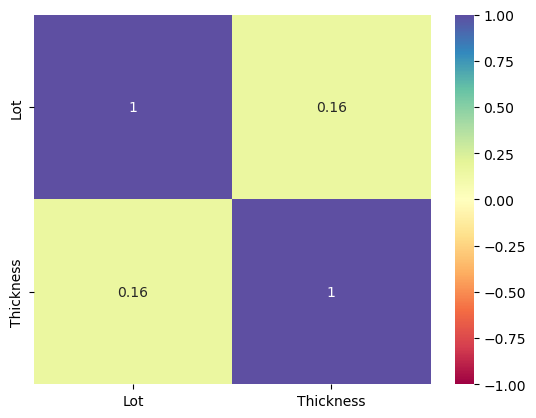

In [14]:
pearson = data.loc[:,numeric_col].corr()
sns.heatmap(data=pearson,
            annot=True, vmin=-1, vmax=1, center= 0, cmap='Spectral');

### Таким образом, мультиколлериальность отсутствует

# 3. Оценка влияния значимых факторов на источник данных или происхождение соответствующих наблюдений или записей

In [18]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/nlme/Oxide.csv')

In [19]:
df

,Unnamed: 0,Source,Lot,Wafer,Site,Thickness
0,1,1,1,1,1,2006
1,2,1,1,1,2,1999
2,3,1,1,1,3,2007
3,4,1,1,2,1,1980
4,5,1,1,2,2,1988
...,...,...,...,...,...,...
67,68,2,8,2,2,1993
68,69,2,8,2,3,1996
69,70,2,8,3,1,1990
70,71,2,8,3,2,1989


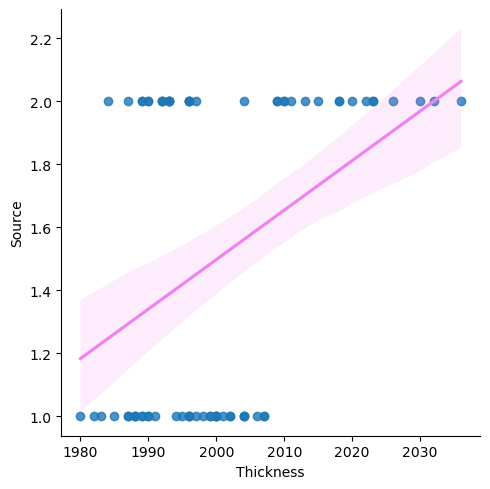

In [20]:
sns.lmplot(data=df,x = 'Thickness', y='Source', line_kws={'color':'violet'} )

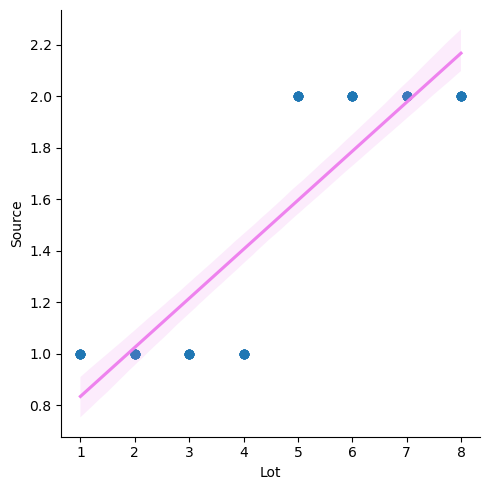

In [21]:
sns.lmplot(data=df,x = 'Lot', y='Source', line_kws={'color':'violet'} )

# 4. Прогнозирование 

In [23]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/nlme/Oxide.csv')

In [24]:
df

,Unnamed: 0,Source,Lot,Wafer,Site,Thickness
0,1,1,1,1,1,2006
1,2,1,1,1,2,1999
2,3,1,1,1,3,2007
3,4,1,1,2,1,1980
4,5,1,1,2,2,1988
...,...,...,...,...,...,...
67,68,2,8,2,2,1993
68,69,2,8,2,3,1996
69,70,2,8,3,1,1990
70,71,2,8,3,2,1989


In [26]:
## выберем 4 случайных строки
df_ppl = df.sample(n=4)
df_ppl

,Unnamed: 0,Source,Lot,Wafer,Site,Thickness
47,48,2,6,1,3,2030
15,16,1,2,3,1,1985
18,19,1,3,1,1,2000
40,41,2,5,2,2,2018


In [27]:
model = smf.ols(formula='Source ~ Lot+Thickness', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Source   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.10e-27
Time:                        22:11:30   Log-Likelihood:                 11.437
No. Observations:                  72   AIC:                            -16.87
Df Residuals:                      69   BIC:                            -10.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.1244      3.969     -5.070      0.000     -28.043     -12.206
Lot            0.1812      0.011     16.482      0.000       0.159       0.203
Thickness      0.0104      0.002      5.233      0.000       0.006       0.014
==============================================================================
Omnibus:                        6.110   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                3.798
Skew:                          -0.385   Prob(JB):                        0.150
Kurtosis:                       2.179   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
res = model.predict(exog=df_ppl, transform=True)

In [29]:
df_res = pd.DataFrame(res.round(2), columns=['Прогноз'])
df_res.reset_index(drop=True , inplace=True)
df_res.index += 1
df_res

,Прогноз
1,2.08
2,0.89
3,1.23
4,1.78


## Итак, мы наблюдаем прогноз Source, то есть источника данных или происхождения соответствующих наблюдений или записей 

# 5. Далее проведем тест на гетероскедастичность 

In [30]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/nlme/Oxide.csv')

In [31]:
model = smf.ols(formula='Source ~ Lot + Thickness', data=df)

In [32]:
results = model.fit()

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Source   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.10e-27
Time:                        22:13:56   Log-Likelihood:                 11.437
No. Observations:                  72   AIC:                            -16.87
Df Residuals:                      69   BIC:                            -10.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.1244      3.969     -5.070      0.0

In [34]:
from scipy.stats import t

In [35]:
alpha = 0.05
df = results.df_resid

In [36]:
critical_t = abs(t.ppf(alpha/2, df))

In [37]:
print(round(critical_t, 2))

1.99


## Выводы

1. Коэффициенты наклона для обеих независимых переменных, "Lot" и "Thickness", значительно превышают по абсолютной величине значение 1.99. Это указывает на то, что обе независимые переменные являются статистически значимыми и вносят значимый вклад в объяснение зависимой переменной "Source".
2. Поскольку значения t-статистики для обеих независимых переменных значительно превышают значение 1.99, это означает, что мы можем отклонить нулевую гипотезу о незначимости коэффициентов наклона для этих переменных.